In [12]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [21]:
df=pd.read_csv(r'C:\Users\peddi\Desktop\DATA SCIENCE\R programming ppts\.CSV files\Housing.csv')

In [22]:
df.head()

,Unnamed: 0,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,1,42000.0,5850,3,1,2,yes,no,yes,no,no,1,no
1,2,38500.0,4000,2,1,1,yes,no,no,no,no,0,no
2,3,49500.0,3060,3,1,1,yes,no,no,no,no,0,no
3,4,60500.0,6650,3,1,2,yes,yes,no,no,no,0,no
4,5,61000.0,6360,2,1,1,yes,no,no,no,no,0,no


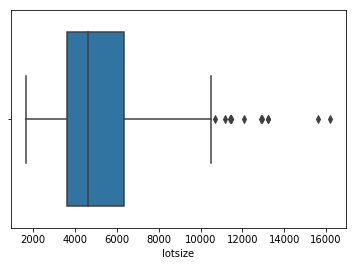

In [23]:
sns.boxplot(df['lotsize'])

In [37]:
df['new_bedrooms']=np.where(df['bedrooms']>=4.5,4.5,df['bedrooms'])
df['new_bathrms']=np.where(df['bathrms']>=3.5,3.5,df['bathrms'])
df['new_stories']=np.where(df['stories']>=3.5,3.5,df['stories'])
df['new_garagepl']=np.where(df['garagepl']>=2.5,2.5,df['garagepl'])
df['new_price']=np.where(df['price']>=130000,130000,df['price'])
df['new_lotsize']=np.where(df['lotsize']>=11000,11000,df['lotsize'])

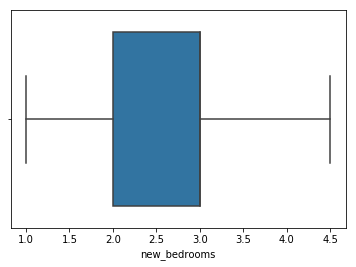

In [39]:
sns.boxplot(df['new_bedrooms'])

#catergorical & numerical seperation

In [41]:
cat=df.select_dtypes(include=[object])
num=df.select_dtypes(include=[np.number])

In [54]:
num.drop(['price','lotsize','Unnamed: 0','bedrooms','bathrms','stories','garagepl'],axis=1,inplace=True)

C:\Users\peddi\Anaconda3\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [58]:
cat.head()

,driveway,recroom,fullbase,gashw,airco,prefarea
0,yes,no,yes,no,no,no
1,yes,no,no,no,no,no
2,yes,no,no,no,no,no
3,yes,yes,no,no,no,no
4,yes,no,no,no,no,no


In [56]:
num.isnull().sum()

new_bedrooms    0
new_bathrms     0
new_stories     0
new_garagepl    0
new_price       0
new_lotsize     0
dtype: int64

In [57]:
cat.isnull().sum()

driveway    0
recroom     0
fullbase    0
gashw       0
airco       0
prefarea    0
dtype: int64

In [59]:
import sklearn

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le=LabelEncoder()

In [63]:
cat1=cat.apply(le.fit_transform)

In [64]:
df1=pd.concat([cat1,num],axis=1)

In [65]:
df1.head()

,driveway,recroom,fullbase,gashw,airco,prefarea,new_bedrooms,new_bathrms,new_stories,new_garagepl,new_price,new_lotsize
0,1,0,1,0,0,0,3.0,1.0,2.0,1.0,42000.0,5850
1,1,0,0,0,0,0,2.0,1.0,1.0,0.0,38500.0,4000
2,1,0,0,0,0,0,3.0,1.0,1.0,0.0,49500.0,3060
3,1,1,0,0,0,0,3.0,1.0,2.0,0.0,60500.0,6650
4,1,0,0,0,0,0,2.0,1.0,1.0,0.0,61000.0,6360


In [71]:
Y=pd.DataFrame(df1['new_price'])

In [72]:
Y.head()

,new_price
0,42000.0
1,38500.0
2,49500.0
3,60500.0
4,61000.0


In [73]:
X=df1.drop(['new_price'],axis=1)

In [74]:
X.head()

,driveway,recroom,fullbase,gashw,airco,prefarea,new_bedrooms,new_bathrms,new_stories,new_garagepl,new_lotsize
0,1,0,1,0,0,0,3.0,1.0,2.0,1.0,5850
1,1,0,0,0,0,0,2.0,1.0,1.0,0.0,4000
2,1,0,0,0,0,0,3.0,1.0,1.0,0.0,3060
3,1,1,0,0,0,0,3.0,1.0,2.0,0.0,6650
4,1,0,0,0,0,0,2.0,1.0,1.0,0.0,6360


In [76]:
from sklearn.model_selection import train_test_split

In [77]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

In [78]:
len(X_test),len(Y_train), len(X_train),len(Y_test)

(110, 436, 436, 110)

In [79]:
from sklearn.linear_model import LinearRegression

In [80]:
lr=LinearRegression()

In [81]:
model=lr.fit(X_train,Y_train)

In [82]:
pred=model.predict(X_test)

In [83]:
from sklearn.metrics import r2_score

In [85]:
r2_score(pred,Y_test)*100

53.30690766558182